# <center>**Mini-projet n°4 : Le pendule (Combes Robin)**</center>

___

## <ins>Objectif :</ins>
On souhaite caractériser l'évolution du système du pendule simple dans différents contextes associés à différents jeux de paramètres initiaux, en utilisant des méthodes d'analyse numérique.

## <ins>Cadre de la modélisation :</ins>

* On se place dans le référentiel terrestre supposé galiléen, munit du repère cartésien $\mathrm{(O,\vec{e_x},\vec{e_y},\vec{e_z})}$ (i.e. on néglige les effets des forces centrifuge et de Coriolis)
* On considère une masse ponctuelle ($\mathrm{m}$) dont la position est repérée par un point $\mathrm{M}$ de l'espace, ainsi qu'un fil de masse négligeable et de longueur $\mathrm{l}$ fixée reliant cette masse ponctuelle ($\mathrm{m}$) à l'origine du repère cartésien précédemment défini.
* Les différentes forces s'appliquant sur la masse ponctuelle ($\mathrm{m}$), considérées dans notre cadre d'étude, sont :
    * le poids résultant de l'attraction gravitationnelle terrestre, noté : $\,\,\mathrm{\vec P}$
    * la force de tension exercée par le fil sur la masse, notée : $\,\,\mathrm{\vec T}$
    * la résultante des forces de frottements visqueux, notée : $\,\,\mathrm{\vec f}$, qu'on modélisera en première approximation par une expression linéaire en vitesse, de sorte que l'on a : $\,\,\mathrm{\vec{f}=-\alpha }\vec v$, &emsp;avec $\vec v$ le vecteur vitesse associé à la masse ponctuelle ($\mathrm{m}$) et $\alpha$ un coefficient réel positif

Ci-dessous se trouve un schéma de la situatiuon :

!["Schema du Pendule"](SchemaPendule.png)

<a id="E0_id"></a>

En applicant le principe fondamental de la dynamique à la masse ponctuelle ($\mathrm{m}$), en projection selon la droite dirigée par le vecteur $\mathrm{\vec{e_\theta}}$ de la base locale polaire associée au point $\mathrm{M}$ : $\mathrm{(\vec{e_r},\vec{e_\theta})}$, on obtient la relation suivante : <br>$$\mathrm{m.l.\ddot{\theta}=-\alpha .l.\dot{\theta}-m.g.sin(\theta)} \iff \boxed{\mathrm{(E_0):\,\,\ddot{\theta}+q.\dot{\theta}+\Omega ^{2}.sin(\theta)=0,\,\,\,avec\,\,q=\frac{\alpha}{m}\,\,et\,\,\Omega=\sqrt{\frac{g}{l}}}}$$

En considérant l'approximation des petits angles, on obtient à partir de l'équation $\mathrm{(E_0)}$ déterminée précédemment, l'équation $\mathrm{(E_1)}$ suivante : <a id="eq1"></a>
<br><br>$$\boxed{\mathrm{(E_1):\,\,\ddot{\theta}+q.\dot{\theta}+\Omega ^{2}.\theta=0,\,\,\,avec\,\,q=\frac{\alpha}{m}\,\,et\,\,\Omega=\sqrt{\frac{g}{l}}}}$$

Par commodité, on fixera pour l'ensemble des sections suivantes la valeur de $\Omega$ à $1\,\mathrm{rad.s^{-1}}$.

###### [$\downarrow$(E2)](#eq2)

### I) Approximation des petits angles

L'objet de cette section est d'approcher la solution de l'équation différentielle $\mathrm{(E_{1})}$ à l'aide de la méthode numérique de Runge-Kutta d'ordre 4 sur l'intervalle de temps $\mathrm{\Delta_{t}=[0\,s,20\,s]}$ avec un pas infinitésimal de temps fixé à $\mathrm{dt=0.05\,s}$.
<br><br>On affichera alors sur un même graphe l'évolution de l'angle $\theta$ en fonciton du temps pour les différentes valeurs du coeffcient d'amortissement $\mathrm{q}$ suivantes : $\mathrm{q=1\,s^{-1}\,;\,q=2\,s^{-1} \,\,et\,\,q=5\,s^{-1}}$; et on considérera par ailleurs que les conditions initiales suivantes sont vérifiées : $\mathrm{\theta(t=0)=10°\,\,et\,\,\dot{\theta}(t=0)=0}$.

In [38]:
"""Import des modules nécessaires"""
import numpy as np
from matplotlib import pyplot as plt

In [39]:
"""On définit une fonction qui prend en entrée un intervalle de temps et un pas, 
            et retourne l'intervalle de temps discrétisé selon ce pas"""
def discrete(intervalle_de_temps,pas):
    discrete_in_tps = np.arange(intervalle_de_temps[0], intervalle_de_temps[1], pas)
    if round(discrete_in_tps[-1] + pas, 14) == intervalle_de_temps[1]:
        discrete_in_tps = np.append(discrete_in_tps, intervalle_de_temps[1])
    return discrete_in_tps

In [40]:
"""On définit la fonction permettant d'implémenter la méthode d'approximation RK4 dans le cadre de notre exercice"""
def RK4(intervalle_de_temps, pas, valeurs_initiales, f):
        
        #On crée le vecteur contenant l'ensemble des instants résultant de la discrétisation de l'intervalle de temps
        discrete_in_tps=discrete(intervalle_de_temps,pas)
       
        #On initialise les vecteurs destinés à contenir les valeurs de θ et dθ/dt évalués en les différents instants définis précédemment
        θ = np.zeros_like(discrete_in_tps, dtype=float)
        dθ = np.zeros_like(discrete_in_tps, dtype=float)
        θ[0] = valeurs_initiales[0]
        dθ[0] = valeurs_initiales[1]
        
        #On implémente l'algorithme RK4 en lui même
        for i in range(1, len(discrete_in_tps)):
            k1_θ = dθ[i - 1]
            k1_dθ = f(discrete_in_tps[i - 1], θ[i - 1], dθ[i - 1])
            
            k2_θ = dθ[i - 1] + 0.5 * pas * k1_dθ
            k2_dθ = f(discrete_in_tps[i - 1] + 0.5 * pas, θ[i - 1] + 0.5 * pas * k1_θ, dθ[i - 1] + 0.5 * pas * k1_dθ)
            
            k3_θ = dθ[i - 1] + 0.5 * pas * k2_dθ
            k3_dθ = f(discrete_in_tps[i - 1] + 0.5 * pas, θ[i - 1] + 0.5 * pas * k2_θ, dθ[i - 1] + 0.5 * pas * k2_dθ)
            
            k4_θ = dθ[i - 1] + pas * k3_dθ
            k4_dθ = f(discrete_in_tps[i - 1] + pas, θ[i - 1] + pas * k3_θ, dθ[i - 1] + pas * k3_dθ)
            
            θ[i] = θ[i - 1] + (1 / 6) * pas * (k1_θ + 2 * k2_θ + 2 * k3_θ + k4_θ)
            dθ[i] = dθ[i - 1] + (1 / 6) * pas * (k1_dθ + 2 * k2_dθ + 2 * k3_dθ + k4_dθ)
        
        #On retourne le triplet contenant dans l'ordre : l'intervalle de temps discrétisé, les valeurs de θ en ces instants, les valeurs de dθ/dt en ces instants
        return (discrete_in_tps, θ, dθ)

In [54]:
"""On définit la fonction f telle que d(dθ/dt)/dt = f(t,θ,dθ/dt)"""
def f1(t,θ,dθ,q):
    return -q*dθ-θ

In [58]:
"""On définit la fonction permettant d'afficher les courbes attendues"""
def plot_1(f):
    plt.figure(figsize=(7,4.8)) 
    #On crée la liste destinée à contenir les valeurs de q
    q_vals=[1,2,5]
    #On itère sur les valeurs du paramètre q
    for q in q_vals:
        #On affiche la courbe correspondant à une valeur donnée de q
        plt.plot(RK4([0, 20], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,q))[0], RK4([0, 20], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,q))[1], label="q={}".format(q))
    plt.suptitle("Représentation du graphe de la solution approchée \nde l'équation $\mathrm{(E_1)}$ par la méthode RK4 pour différentes valeurs de q",fontsize=15, fontweight='light', horizontalalignment='center',y=1.02)
    plt.xlabel("Temps (s)",fontsize=12,labelpad=10)     
    plt.ylabel("Valeur de l'angle θ (rad)",fontsize=12,labelpad=7)
    plt.legend(frameon = True, facecolor = 'floralwhite', shadow = True, fancybox = True)
    plt.show()

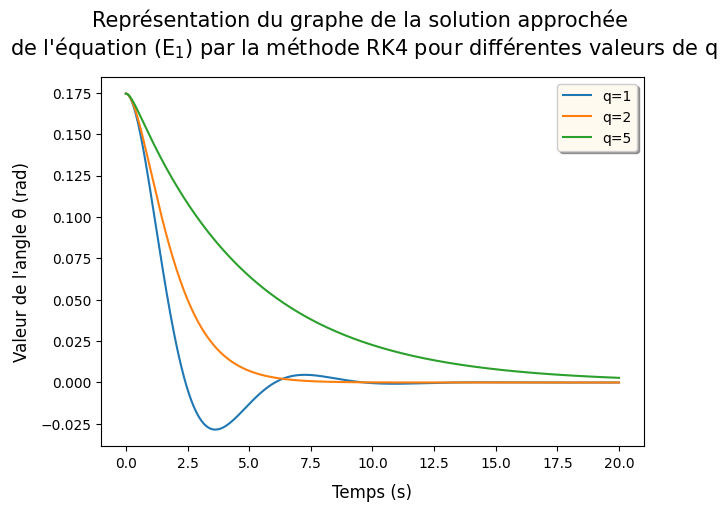

In [59]:
"""On affiche finalement les courbes en appelant la fonction"""
plot_1(f1)

On constate alors bien que lorsque le paramètre $\mathrm{q}$ vaut 1 (courbe bleue) : on obtient un régime pseudo-périodique, lorsque $\mathrm{q}$ vaut 2 (courbe orange) : un régime critique et lorsque $\mathrm{q}$ vaut 5 (courbe verte) : un régime apériodique.

### II) Force d'excitation <a id="eq2"></a>

Dans cette section, on se pose la question des changements apportés par l'ajout d'une force excitatrice s'exerçant sur le pendule, de sorte que l'équation $\mathrm{(E_1)}$ obtenue [précédemment](#eq1) devient l'équation $\mathrm{(E_2)}$ suivante :
$$\boxed{\mathrm{(E_2):\,\,\ddot{\theta}+q.\dot{\theta}+\Omega ^{2}.\theta=F_{e}.sin(\Omega_{e}.t)}}$$

On fixera pour la suite la valeur de $\Omega_e$ à $\frac{2\Omega}{3}$.
<br>Il s'agit désormais d'afficher sur un même graphe la trajectoire solution obtenue avec la méthode RK4 dans l'espace des phases $\left(\theta,\frac{\mathrm{d}\theta}{\mathrm{d}t}\right)$ pour le pendule libre ($\mathrm{q=0}$ et $\mathrm{F_e=0}$), amorti ($\mathrm{q=1}$ et $\mathrm{F_e=0}$), et amorti avec excitation ($\mathrm{q=1}$ et $\mathrm{F_e=1}$).

In [69]:
"""On définit la fonction f telle que d(dθ/dt)/dt = f(t,θ,dθ/dt)"""
def f2(t,θ,dθ,q,Fe):
    return -q*dθ-θ+Fe*np.sin((2/3)*t)

In [85]:
"""On définit la fonction permettant d'afficher les courbes attendues"""
def plot_2(f):
    plt.figure(figsize=(7,4.8)) 
    #On crée les listes destinées à contenir les valeurs de q et de Fe
    q_vals=[0,1,1]
    Fe_vals=[0,0,1]
    #On boucle sur les valeurs de q et de Fe
    for (q,Fe) in zip(q_vals,Fe_vals):
        #On affiche la courbe correspondant à une valeur donnée de q et de Fe
        plt.plot(RK4([0, 20], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,q,Fe))[1], RK4([0, 20], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,q,Fe))[2], label="(q={}, F$_e$={})".format(q,Fe))
    plt.suptitle("Représentation dans l'espace des phases des différentes trajectoires \nobtenues par l'approximation RK4 pour différents jeux de paramètres (q,F$\mathrm{_e}$)",fontsize=15, fontweight='light', horizontalalignment='center',y=1.03) #On définit le "sur-titre" du graphe et ses paramètres   
    plt.xlabel("Valeur de θ (rad)",fontsize=12,labelpad=10)
    plt.ylabel(r"Valeur de $\mathrm{\frac{dθ}{dt}}$ (rad.s$^{-1}$)",fontsize=12,labelpad=7)
    plt.legend(frameon = True, facecolor = 'floralwhite', shadow = True, fancybox = True)
    plt.show()

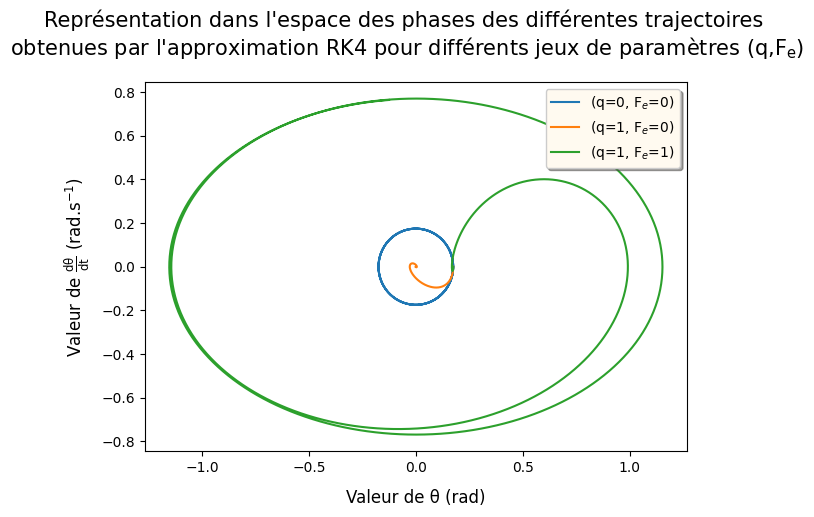

In [86]:
"""On affiche finalement les courbes en appelant la fonction"""
plot_2(f2)

<div style='text-align:justify;'>Le cas du couple de paramètres : $\mathrm{(q=0,\,F_e=0)}$ , correspond à la situation d'un pendule simple oscillant sans force extérieure excitatrice et sans frottements dans un certain milieu. On constate alors que la trajectoire dans l'espace des phases obtenue est cohérente avec ce contexte : le pendule y oscille périodiquement entre la position repérée par l'angle $\theta_1=10°$  et celle repérée par l'angle $\theta_2=-10°$  avec une vitesse angulaire négative dans son mouvement depuis l'angle $\theta_1$ vers l'angle $\theta_2$ et inversément une vitesse angulaire positive depuis l'angle $\theta_2$ vers l'angle $\theta_1$.</div>

<br><div style='text-align:justify;'>Le cas du couple de paramètres : $\mathrm{(q=1,\,F_e=0)}$ , correspond à la situation d'un pendule simple oscillant sans force extérieure excitatrice et dans un certain milieu avec frottements. On constate alors que la trajectoire dans l'espace des phases obtenue est également cohérente avec ce contexte : le pendule est lâché à la position repérée par l'angle $\theta_1$ puis au cours de son mouvement et du fait des forces de frottements qui s'exercent sur lui, ses oscillations se retrouvent amorties et le pendule finit rapidement sa course à la position repérée par l'angle $\theta_0=0°$ avec une vitesse angulaire nulle.</div>

<br><div style='text-align:justify;'>Le cas du couple de paramètres : $\mathrm{(q=1,\,F_e=1)}$ , correspond à la situation d'un pendule simple oscillant avec présence d'une force extérieure excitatrice et dans un certain milieu avec frottements. On constate alors que la trajectoire dans l'espace des phases obtenue est là encore cohérente avec ce contexte : le pendule est lâché à la position repérée par l'angle $\theta_1$ puis la force extérieure excitatrice va immédiatement agir sur ce dernier et venir contrer les forces de frottements exercées par le milieu dans lequel le pendule oscille ; il s'en suit un régime transitoire de quelques secondes à la fin duquel le pendule adopte une trajectoire périodique dans l'espace des phases.</div>

### III) Mouvement chaotique

Dans cette section, on décide désormais de sortir du cadre de l'approximation des petits angles et de conserver la présence d'une force extérieure excitatrice s'exerçant sur le pendule, de sorte à aboutir à l'équation non linéaire $\mathrm{(E_3)}$ suivante :
$$\boxed{\mathrm{(E_3):\,\,\ddot{\theta}+q.\dot{\theta}+\Omega ^{2}.sin(\theta)=F_{e}.sin(\Omega_{e}.t)}}$$

L'objet de cette partie est alors d'illustrer le caractère chaotique de la trajectoire suivie par le pendule pour certains jeux de paramètres.
<br>On se placera pour cela dans les conditions suivantes :
* $\mathrm{\theta(t=0)=10°}$
* $\mathrm{\dot{\theta}(t=0)=0}$
* $\mathrm{\Omega_e=\frac{2\Omega}{3}=\frac{2}{3}\,\,\,\,car\,\,on\,\,a\,\,considéré\,\,initialement\,\,\Omega=1}$
* $\mathrm{q=0.5\,s^{-1}}$

On va ainsi chercher a afficher le graphe de l'évolution de l'angle $\theta$ en fonciton du temps pour différentes valeurs de l'intensité de la force $\mathrm{F_e \in \{1.4,1.44,1.465,1.5\}}$, sur une durée $\mathrm{\Delta_t=100\,s}$.

In [78]:
"""On définit la fonction f telle que d(dθ/dt)/dt = f(t,θ,dθ/dt)"""
def f3(t,θ,dθ,Fe):
    return -0.5*dθ-np.sin(θ)+Fe*np.sin((2/3)*t)

In [79]:
"""On définit la fonction permettant de transformer un vecteur contenant des valeurs d'angles"""
def bound(θ):
    for k in range(len(θ)):
        if (abs(θ[k])>2*np.pi) or (θ[k]<0) :
            θ[k]%=(2*np.pi)
        if θ[k]>np.pi:
            θ[k]-=2*np.pi
    return θ

In [87]:
"""On définit la fonction permettant d'afficher les courbes attendues"""
def plot_3(f):
    #On crée la liste destinée à contenir les valeurs de Fe
    Fe_vals=[1.4,1.44,1.465,1.5]
    #On définit une fenêtre multi-graphique
    g,ax=plt.subplots(2,2)
    #On crée un vecteur contenant les coordonnées des 4 axes composant la figure
    w=[(0,0),(0,1),(1,0),(1,1)]
    #On initialise la variable qui permettra d'itérer sur w
    i=0
    #On boucle sur les valeurs possibles de Fe
    for Fe in Fe_vals:
        #On récupère le vecteur contenant les valeurs de l'angle θ et on ramène ces valeurs dans [-π,π]
        θ_bounded=bound(RK4([0, 100], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,Fe))[1])
        #On paramètre l'axe destiné à afficher le graphe de θ pour une valeur de Fe donnée    
        ax[w[i][0],w[i][1]].set_title("Représentation du graphe de la solution approchée \nde l'équation $(E_1)$ par la méthode RK4 pour F$_e$={}".format(Fe),fontsize=15, fontweight='light', horizontalalignment='center',y=1.02)
        ax[w[i][0],w[i][1]].set_xlabel("Temps (s)",fontsize=12,labelpad=10)
        ax[w[i][0],w[i][1]].set_ylabel("Valeur de l'angle θ (rad)",fontsize=12,labelpad=7)
        ax[w[i][0],w[i][1]].plot(RK4([0, 100], 0.05, [(10*np.pi)/180,0], lambda t,θ,dθ : f(t,θ,dθ,Fe))[0],θ_bounded, label="F$_e$={}".format(Fe))
        
        i+=1
    g.tight_layout(rect=[0,0,2,2],w_pad=3,h_pad=3)
    plt.show()

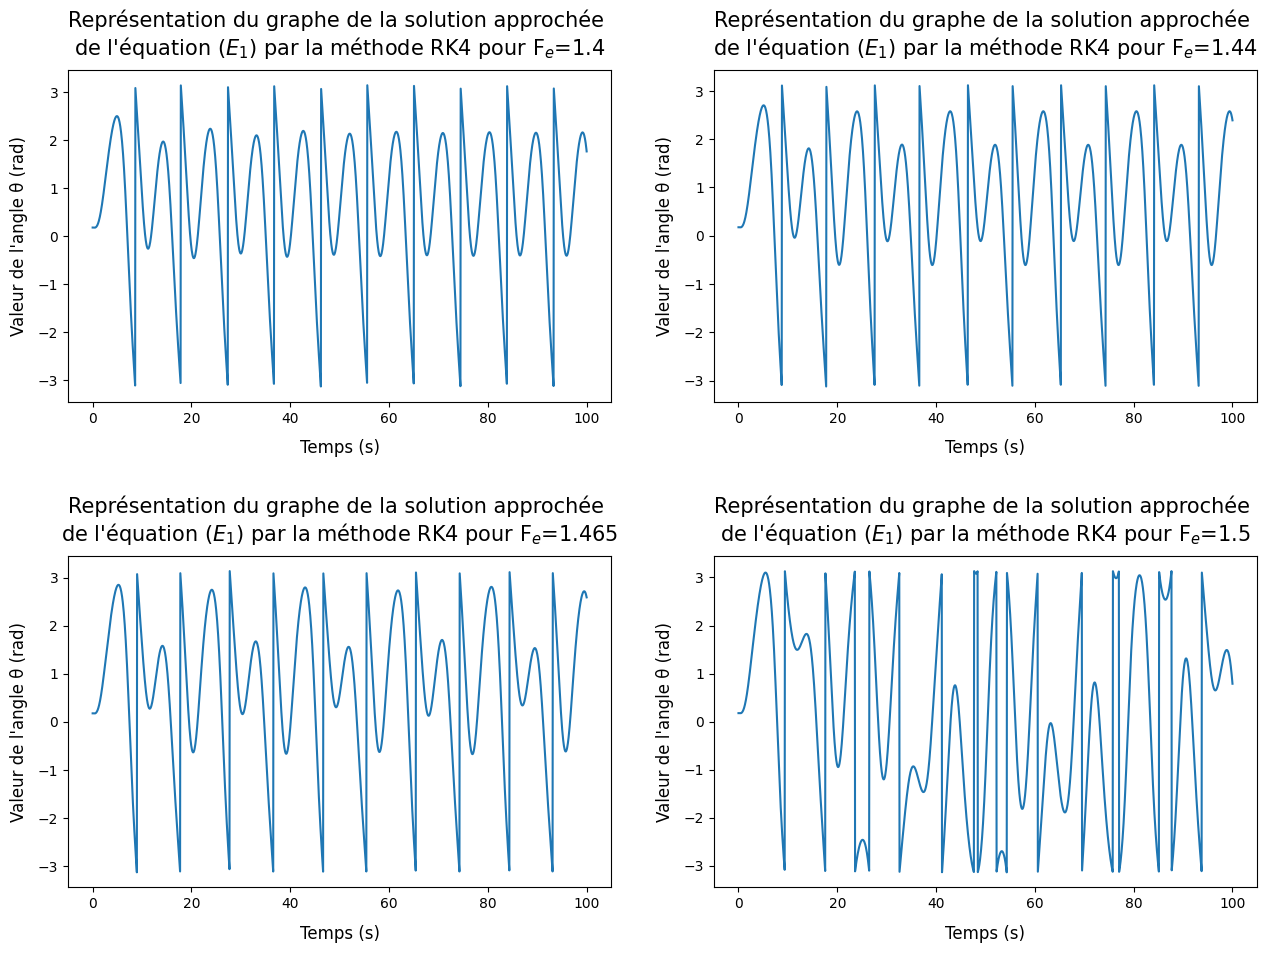

In [88]:
"""On affiche finalement les courbes en appelant la fonction"""
plot_3(f3)

On constate alors que la valeur de la période associée au mouvement du pendule semble relativement identique dans les trois premiers cas, i.e. pour les valeurs de l'intensité de la force $\mathrm{F_e}$ suivantes : $\mathrm{1.4\,\,rad.s^{-1},\,1.44\,\,rad.s^{-1},\,et\,\,1.465\,\,rad.s^{-1}}$, tandis que dans le dernier cas, i.e. pour $\mathrm{F_e=1.5\,\,rad.s^{-1}}$, le mouvement du pendule ne semble pas périodique.

On se pose alors la question de savoir quel serait l'impact d'une modification minime de l'angle de lâcher intial sur le mouvement suivit par le pendule dans ce dernier cas manifestement chaotique où $\mathrm{F_e=1.5\,\,rad.s^{-1}}$.
<br>Pour cela, on se propose de tracer la différence en valeur absolue entre les deux solutions de l'équation $\mathrm{(E_3)}$ obtenues par la méthode RK4, l'une pour un angle de lâcher initial de $10°$ et l'autre pour un angle de lâcher intial de $9.999°$.
<br><br>On affichera la courbe obtenue en échelle semi-logarithmique.

In [97]:
"""On définit la fonction f telle que d(dθ/dt)/dt = f(t,θ,dθ/dt)"""
def f4(t,θ,dθ):
    return -0.5*dθ-np.sin(θ)+1.5*np.sin((2/3)*t)

In [98]:
"""On définit la fonction permettant d'afficher les courbes attendues"""
def plot_4(f):
        #On récupère le vecteur contenant les valeurs de l'angle θ et on ramène ces valeurs dans [-π,π]
        θ1=RK4([0, 200], 0.05, [(10*np.pi)/180,0], f)[1]
        θ2=RK4([0, 200], 0.05, [(9.999*np.pi)/180,0], f)[1]
        θ1_bounded=bound(θ1)
        θ2_bounded=bound(θ2)
        
        plt.suptitle("Écart absolu entre la solution de l'équation $\mathrm{(E_3)}$ obtenue pour pour un \nangle de lâcher initial de 10° et celle obtenue pour un angle de lâcher initial de 9.999°",fontsize=15, fontweight='light', horizontalalignment='center',y=1.02)
        plt.xlabel("Temps (s)",fontsize=12,labelpad=10)
        plt.ylabel("Valeur de l'écart absolu",fontsize=12,labelpad=7)
        plt.plot(RK4([0, 200], 0.05, [(10*np.pi)/180,0], f)[0], abs(θ1-θ2))
        plt.grid()
        plt.yscale('log')
        plt.ylim(1e-8,1e2)
        plt.yticks([10**i for i in range(-8,3,1)])
        plt.show()

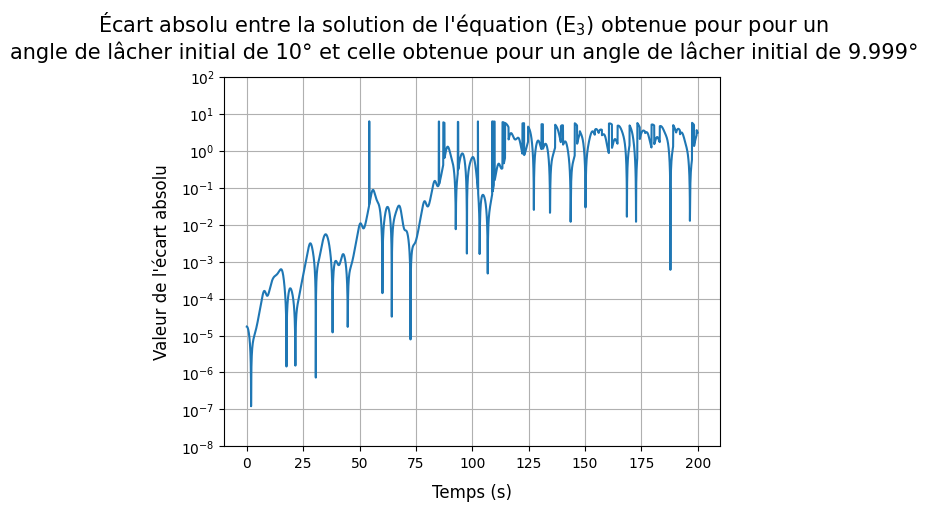

In [99]:
plot_4(f4)

En traçant l'écart absolu sur une durée de 200 secondes, on constate alors une tendance à l'augmentation globale de l'écart absolu jusqu'au temps $\mathrm{t=100\,s}$.